In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
test['Loan_Status'] = np.NaN
train['train_test']=0
test['train_test']=1
all_data = pd.concat([train,test])

In [7]:
all_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,train_test
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,1
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,1


In [8]:
all_data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
train_test             0
dtype: int64

In [9]:
all_data.Gender = all_data.Gender.fillna(all_data.Gender.mode()[0])

In [10]:
all_data.Married = all_data.Married.fillna(all_data.Married.mode()[0])

In [11]:
all_data.Dependents = all_data.Dependents.fillna(all_data.Dependents.mode()[0])

In [12]:
all_data.Self_Employed = all_data.Self_Employed.fillna(all_data.Self_Employed.mode()[0])

In [13]:
all_data.LoanAmount = all_data.LoanAmount.fillna(all_data.LoanAmount.median())

In [14]:
all_data.Loan_Amount_Term = all_data.Loan_Amount_Term.fillna(all_data.Loan_Amount_Term.mode()[0])

In [15]:
all_data.Credit_History = all_data.Credit_History.fillna(all_data.Credit_History.mode()[0])

In [16]:
all_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
train_test             0
dtype: int64

In [19]:
train_cleaned = all_data.loc[all_data['train_test']==0]
test_cleaned = all_data.loc[all_data['train_test']==1]



In [30]:
train_copy = train_cleaned.copy()
test_copy = test_cleaned.copy()



In [21]:
X = train_cleaned.drop(['train_test','Loan_Status'],1)
y = train_cleaned.Loan_Status

In [22]:
X = pd.get_dummies(X)

In [26]:
y = y.map({'N':0,'Y':1})

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.7662337662337663

In [32]:
train_copy = train_copy.drop('train_test',1)

In [33]:
train_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
test_copy = test_copy.drop(['Loan_Status','train_test'],1)

In [36]:
test_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [37]:
train_copy['Total_Income'] = train_copy['ApplicantIncome']+train_copy['CoapplicantIncome']
test_copy['Total_Income'] = test_copy['ApplicantIncome']+test_copy['CoapplicantIncome']

In [38]:
train_copy = train_copy.drop(['ApplicantIncome','CoapplicantIncome'],1)
test_copy = test_copy.drop(['ApplicantIncome','CoapplicantIncome'],1)

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

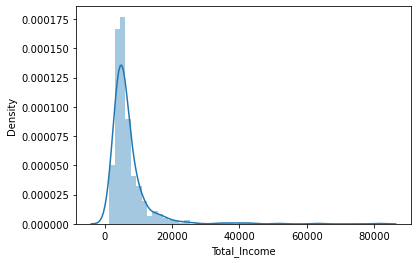

In [39]:
sns.distplot(train_copy.Total_Income)

In [40]:
train_copy['Total_Income'] = np.log(train_copy['Total_Income'])

In [41]:
test_copy['Total_Income'] = np.log(test_copy['Total_Income'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

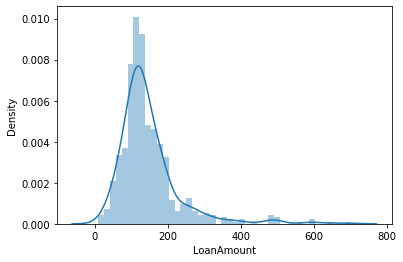

In [42]:
sns.distplot(train.LoanAmount)

In [56]:
train_copy['LoanAmount_Type'] = np.NaN
train_copy.loc[train_copy['LoanAmount']<=75,'LoanAmount_Type'] = 'Low'
train_copy.loc[(train_copy['LoanAmount']>75) & (train_copy['LoanAmount']<=200),'LoanAmount_Type'] = 'Avg'
train_copy.loc[train_copy['LoanAmount']>200,'LoanAmount_Type'] = 'High'

In [59]:
train_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_Type
0,LP001002,Male,No,0,Graduate,No,126.0,360.0,1.0,Urban,Y,8.674026,Avg
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,8.714568,Avg
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,8.006368,Low
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,8.505323,Avg
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,8.699515,Avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,7.972466,Low
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,8.320205,Low
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,9.025456,High
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,8.933664,Avg


In [61]:
train_copy = train_copy.drop('LoanAmount',1)

In [62]:
train_copy = train_copy.drop('Loan_ID',1)

In [63]:
train_copy

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_Type
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026,Avg
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568,Avg
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368,Low
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323,Avg
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515,Avg
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y,7.972466,Low
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y,8.320205,Low
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y,9.025456,High
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y,8.933664,Avg


In [64]:
test_copy['LoanAmount_Type'] = np.NaN
test_copy.loc[test_copy['LoanAmount']<=75,'LoanAmount_Type'] = 'Low'
test_copy.loc[(test_copy['LoanAmount']>75) & (test_copy['LoanAmount']<=200),'LoanAmount_Type'] = 'Avg'
test_copy.loc[test_copy['LoanAmount']>200,'LoanAmount_Type'] = 'High'

test_copy = test_copy.drop('LoanAmount',1)
test_copy = test_copy.drop('Loan_ID',1)

In [65]:
test_copy

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanAmount_Type
0,Male,Yes,0,Graduate,No,360.0,1.0,Urban,8.651724,Avg
1,Male,Yes,1,Graduate,No,360.0,1.0,Urban,8.428581,Avg
2,Male,Yes,2,Graduate,No,360.0,1.0,Urban,8.824678,High
3,Male,Yes,2,Graduate,No,360.0,1.0,Urban,8.494129,Avg
4,Male,No,0,Not Graduate,No,360.0,1.0,Urban,8.094378,Avg
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,360.0,1.0,Urban,8.663196,Avg
363,Male,Yes,0,Graduate,No,360.0,1.0,Urban,8.490233,Avg
364,Male,No,0,Graduate,No,360.0,1.0,Semiurban,8.564649,Avg
365,Male,Yes,0,Graduate,No,360.0,1.0,Rural,8.908289,Avg


In [68]:
X = train_copy.drop(['Loan_Status'],1)
y = train_copy.Loan_Status

X = pd.get_dummies(X)
y = y.map({'N':0,'Y':1})

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [71]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.8051948051948052

In [72]:
test_dummy = pd.get_dummies(test_copy)
test_pred = model.predict(test_dummy)

In [78]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [74]:
sub = pd.read_csv('sample_submission.csv')

In [75]:
sub['Loan_ID'] = test.Loan_ID
sub['Loan_Status'] = test_pred

In [79]:
sub['Loan_Status'] = sub.Loan_Status.map({0:'N',1:'Y'})
sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [80]:
sub.to_csv('predictions_logistic.csv',index=False)

In [81]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
                                       
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

0.7467532467532467

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [92]:
# Optimizing random forest
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(1,200,20),'criterion':('gini','entropy'),'max_depth':range(2,11)}
gs = GridSearchCV(random_forest, parameters,)


In [93]:
gs.fit(X_train,y_train)



GridSearchCV(estimator=RandomForestClassifier(max_depth=3, n_estimators=141),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(2, 11),
                         'n_estimators': range(1, 200, 20)})

In [94]:

gs.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 41}

In [95]:
gs.best_score_

0.8299316005471956

In [96]:
random_forest1 = RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 41)
                                       
random_forest1.fit(X_train, y_train)
pred = random_forest1.predict(X_test)
accuracy_score(y_test,pred)

0.772972972972973

In [98]:
test_pred = random_forest1.predict(test_dummy)
sub['Loan_Status'] = test_pred
sub['Loan_Status'] = sub.Loan_Status.map({0:'N',1:'Y'})
sub.to_csv('predictions_rf.csv',index=False)